# Credit card fraud detection
#### Aamir Hussain

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
pd.set_option('display.max_columns', 35)
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Feature Engineering

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['normalized_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [5]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalized_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


# Model Building

In [6]:
X = df.drop(['Class'], axis=1).values
y = df['Class'].values

In [7]:
print(f'X_Shape: {X.shape}\ny_shape: {y.shape}')

X_Shape: (284807, 29)
y_shape: (284807,)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(29,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(24, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.Dense(24, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

In [11]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')
r = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
6231/6231 [==============================] - 65s 10ms/step - loss: 0.0135 - accuracy: 0.9972 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 2/10
6231/6231 [==============================] - 68s 11ms/step - loss: 0.0040 - accuracy: 0.9992 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 3/10
6231/6231 [==============================] - 77s 12ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 4/10
6231/6231 [==============================] - 64s 10ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0043 - val_accuracy: 0.9990
Epoch 5/10
6231/6231 [==============================] - 62s 10ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0040 - val_accuracy: 0.9994
Epoch 6/10
6231/6231 [==============================] - 61s 10ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 7/10
6231/6231 [==============================] - 63s 10ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0040 -

In [12]:
score = model.evaluate(X_test, y_test)

2671/2671 [==============================] - 13s 5ms/step - loss: 0.0036 - accuracy: 0.9994


In [13]:
print(f'Final Score: {score[1]* 100} %')

Final Score: 99.93914365768433 %


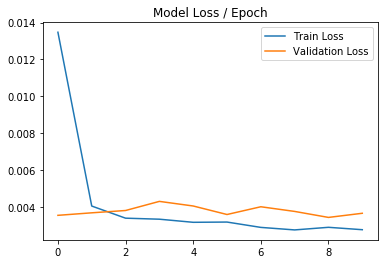

In [14]:
plt.title('Model Loss / Epoch')
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend();

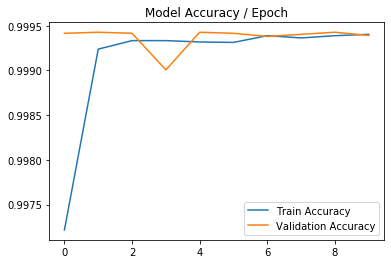

In [15]:
plt.title('Model Accuracy / Epoch')
plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend();

### Predictions and Confusion Matrix

In [16]:
y_pred = model.predict(X_test)
y_pred = y_pred.round().astype(int).reshape(-1,)

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.85      0.78      0.82       147

    accuracy                           1.00     85443
   macro avg       0.93      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443



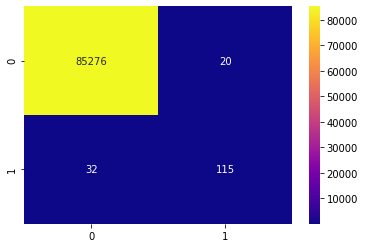

In [18]:
sns.heatmap(cm, annot=True, cmap='plasma', fmt='.10g')

# Taking care of Highly imbalanced dataset

In [19]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [20]:
# we will use a SMOTE to work with this dataset
# !pip install imbalanced-learn

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
X_resample, y_resample = SMOTE().fit_sample(X,y)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)
model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')
r = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
12439/12439 [==============================] - 125s 10ms/step - loss: 0.0292 - accuracy: 0.9901 - val_loss: 0.0157 - val_accuracy: 0.9955
Epoch 2/5
12439/12439 [==============================] - 116s 9ms/step - loss: 0.0116 - accuracy: 0.9969 - val_loss: 0.0097 - val_accuracy: 0.9977
Epoch 3/5
12439/12439 [==============================] - 121s 10ms/step - loss: 0.0092 - accuracy: 0.9977 - val_loss: 0.0085 - val_accuracy: 0.9978
Epoch 4/5
12439/12439 [==============================] - 122s 10ms/step - loss: 0.0080 - accuracy: 0.9981 - val_loss: 0.0073 - val_accuracy: 0.9985
Epoch 5/5
12439/12439 [==============================] - 124s 10ms/step - loss: 0.0071 - accuracy: 0.9983 - val_loss: 0.0069 - val_accuracy: 0.9985


In [44]:
score = model.evaluate(X_test, y_test)
print(f'Final Score: {score[1]* 100} %')

5331/5331 [==============================] - 29s 5ms/step - loss: 0.0069 - accuracy: 0.9985
Final Score: 99.84524250030518 %


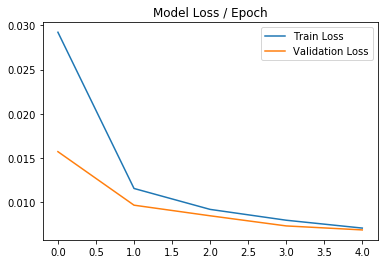

In [45]:
plt.title('Model Loss / Epoch')
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend();

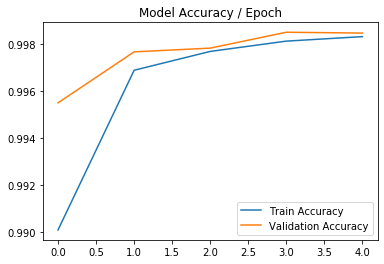

In [46]:
plt.title('Model Accuracy / Epoch')
plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend();

In [47]:
y_pred = model.predict(X_test)
y_pred = y_pred.round().astype(int).reshape(-1,)

In [48]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85473
           1       1.00      1.00      1.00     85116

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



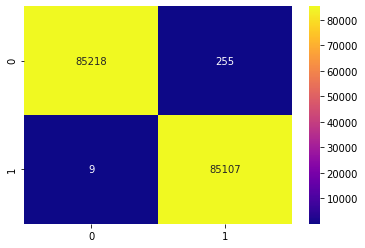

In [49]:
sns.heatmap(cm, annot=True, cmap='plasma', fmt='.10g')

### We get better results across classes with SMOTE